In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/CSE303/Project/insurance_uncleaned_realistic.csv')
print(df1.to_string())


      age      sex     bmi  children smoker     region  blood_pressure exercise_level medical_history       charges
0      19   female  27.900         0    yes  southwest           130.0            low   heart disease  21390.219645
1      18     male  33.770         1     no  southeast           120.0            low        diabetes  12417.971144
2      28     male  33.000         3     no  southeast           150.0            NaN   heart disease  10212.235950
3      33     male  22.705         0     no  northwest             NaN            low             NaN   7879.605950
4      32     male  28.880         0     no  northwest           150.0            low            none  10035.743823
5      31   female  25.740         0     no  southeast           150.0            NaN             NaN  15291.773147
6      46   female  33.440         1     no  southeast             NaN           high               ?  18284.216173
7      37   female  27.740         3     no  northwest           130.0  

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1288 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1308 non-null   object 
 5   region           1338 non-null   object 
 6   blood_pressure   985 non-null    float64
 7   exercise_level   798 non-null    object 
 8   medical_history  1079 non-null   object 
 9   charges          1338 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.7+ KB


In [5]:
df1.isnull().sum()

,0
age,0
sex,0
bmi,50
children,0
smoker,30
region,0
blood_pressure,353
exercise_level,540
medical_history,259
charges,0


<Axes: >

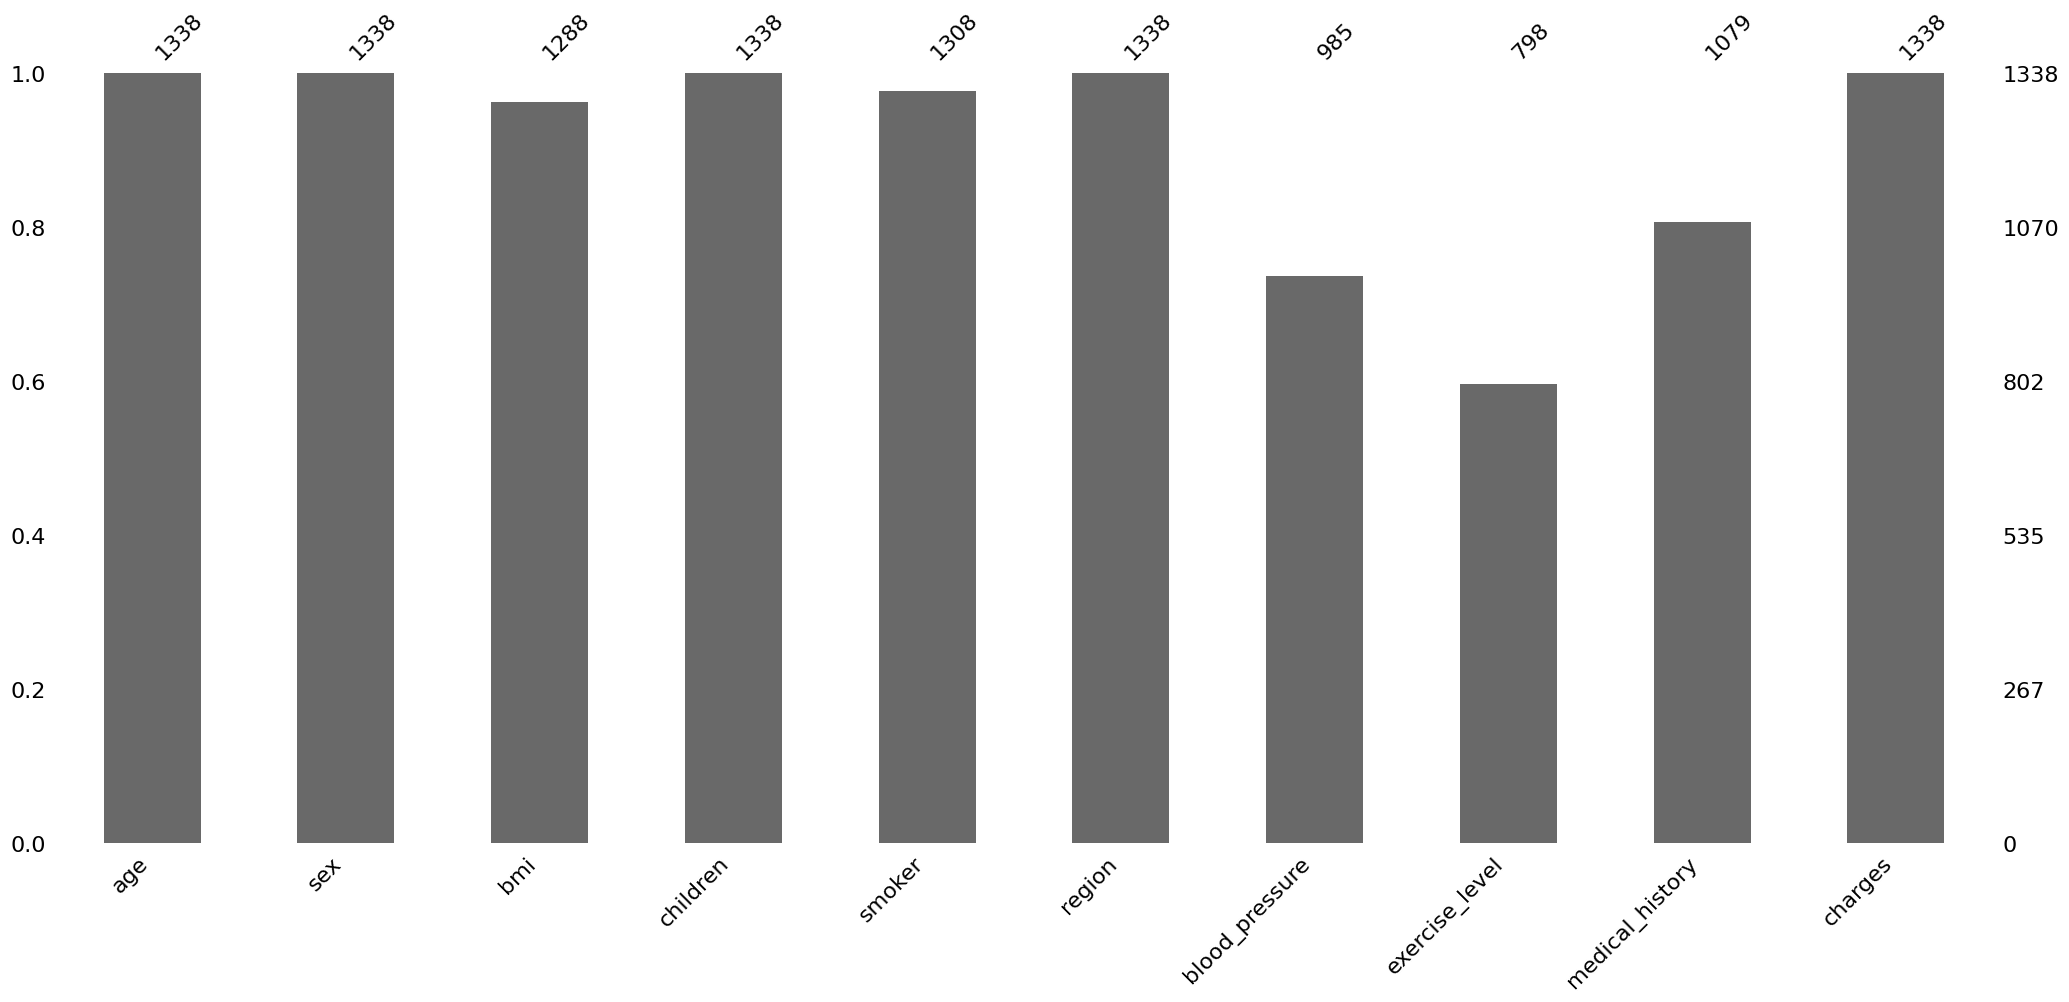

In [33]:
msno.bar(df1) #printing null values bar for better visualization

In [ ]:
df1.describe()

,age,bmi,children,blood_pressure,charges
count,1338.000000,1288.000000,1338.000000,985.000000,1338.000000
mean,39.207025,30.644154,1.094918,293.608122,16528.144632
std,14.049960,6.102779,1.205493,329.430299,8900.732385
min,18.000000,15.960000,0.000000,120.000000,3137.580129
25%,27.000000,26.220000,0.000000,130.000000,11094.766959
50%,39.000000,30.400000,1.000000,150.000000,13817.237582
75%,51.000000,34.585000,2.000000,160.000000,17673.801229
max,64.000000,53.130000,5.000000,999.000000,51723.697745


In [34]:
duplicate = df1[df1.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,blood_pressure,exercise_level,medical_history,charges


There are no duplicate values

In [6]:
# Calculating the percentage of missing values:
missing_value = df1.isnull().mean()* 100
print(missing_value)

age                 0.000000
sex                 0.000000
bmi                 3.736921
children            0.000000
smoker              2.242152
region              0.000000
blood_pressure     26.382661
exercise_level     40.358744
medical_history    19.357250
charges             0.000000
dtype: float64


In [10]:
#filling bmi with mode values cause it has small number of null or missing values

a = df1["bmi"].mode()[0]
df1["bmi"].fillna(a , inplace=True)

print(df1.to_string())

      age     sex     bmi  children smoker     region  blood_pressure exercise_level medical_history       charges  Smoker_Number  Sex_Number  region_number  exercise_level_number
0      19  female  27.900         0    yes  southwest           130.0            low   heart disease  21390.219645              1           0              2                      1
1      18    male  33.770         1     no  southeast           120.0            low        diabetes  12417.971144              0           1              1                      1
2      28    male  33.000         3     no  southeast           150.0         medium   heart disease  10212.235950              0           1              1                      2
3      33    male  22.705         0     no  northwest             NaN            low             NaN   7879.605950              0           1              4                      1
4      32    male  28.880         0     no  northwest           150.0            low            none

/tmp/ipython-input-322347646.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["bmi"].fillna(a , inplace=True)


In [7]:
missing_value = df1.isnull().mean()* 100
print(missing_value)

age                 0.000000
sex                 0.000000
bmi                 3.736921
children            0.000000
smoker              2.242152
region              0.000000
blood_pressure     26.382661
exercise_level     40.358744
medical_history    19.357250
charges             0.000000
dtype: float64


In [12]:
#filling blood presssure with mean values cause it has small number of null or missing values

a = df1["blood_pressure"].mean()
df1["blood_pressure"].fillna(a , inplace=True)

print(df1.to_string())

      age     sex     bmi  children smoker     region  blood_pressure exercise_level medical_history       charges  Smoker_Number  Sex_Number  region_number  exercise_level_number
0      19  female  27.900         0    yes  southwest      130.000000            low   heart disease  21390.219645              1           0              2                      1
1      18    male  33.770         1     no  southeast      120.000000            low        diabetes  12417.971144              0           1              1                      1
2      28    male  33.000         3     no  southeast      150.000000         medium   heart disease  10212.235950              0           1              1                      2
3      33    male  22.705         0     no  northwest      291.777311            low             NaN   7879.605950              0           1              4                      1
4      32    male  28.880         0     no  northwest      150.000000            low            none

/tmp/ipython-input-2330154209.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["blood_pressure"].fillna(a , inplace=True)


In [47]:
missing_value = df1.isnull().mean()* 100
print(missing_value)

age                       0.000000
sex                       0.000000
bmi                       0.000000
children                  0.000000
smoker                    0.000000
region                    0.000000
blood_pressure            0.000000
exercise_level            0.000000
medical_history          19.021739
charges                   0.000000
Smoker_Number             0.000000
Sex_Number                0.000000
region_number             0.000000
exercise_level_number     0.000000
dtype: float64


In [8]:


#droping null values for smoker and creating new column and mapping for numerical
df1 = df1.dropna(subset=['smoker'])
df1['Smoker_Number'] = np.where((df1['smoker'] == "yes"), 1, 0)

#creating new column and mapping for numerical
df1 = df1.drop(df1[df1['sex'].isin(['Unknown', '?'])].index)
df1['Sex_Number'] = np.where((df1['sex'] == "male"), 1, 0)

#creating new column and mapping for numerical
df1['region_number'] = df1['region'].map({
    "southeast": 1,
    "southwest": 2,
    "northeast": 3,
    "northwest": 4,
})

#flling null values with medium cause it has large number of null vallues and creating new column and mapping for numerical
df1["exercise_level"] = df1["exercise_level"].fillna("medium")
df1['exercise_level_number'] = df1['exercise_level'].map({
    "low": 1,
    "medium": 2,
    "high": 3

})

df1.head()

,age,sex,bmi,children,smoker,region,blood_pressure,exercise_level,medical_history,charges,Smoker_Number,Sex_Number,region_number,exercise_level_number
0,19,female,27.900,0,yes,southwest,130.0,low,heart disease,21390.219645,1,0,2,1
1,18,male,33.770,1,no,southeast,120.0,low,diabetes,12417.971144,0,1,1,1
2,28,male,33.000,3,no,southeast,150.0,medium,heart disease,10212.235950,0,1,1,2
3,33,male,22.705,0,no,northwest,NaN,low,NaN,7879.605950,0,1,4,1
4,32,male,28.880,0,no,northwest,150.0,low,none,10035.743823,0,1,4,1


In [11]:
missing_value = df1.isnull().mean()* 100
print(missing_value)

age                       0.000000
sex                       0.000000
bmi                       0.000000
children                  0.000000
smoker                    0.000000
region                    0.000000
blood_pressure           26.086957
exercise_level            0.000000
medical_history          19.021739
charges                   0.000000
Smoker_Number             0.000000
Sex_Number                0.000000
region_number             0.000000
exercise_level_number     0.000000
dtype: float64


In [50]:
#dropping the categorical column in the new data frame
df2 = df1.copy()

df2.drop(columns=['sex','smoker','region','exercise_level','medical_history'], inplace = True)

df2.head()

,age,bmi,children,blood_pressure,charges,Smoker_Number,Sex_Number,region_number,exercise_level_number
0,19,27.900,0,130.000000,21390.219645,1,0,2,1
1,18,33.770,1,120.000000,12417.971144,0,1,1,1
2,28,33.000,3,150.000000,10212.235950,0,1,1,2
3,33,22.705,0,291.777311,7879.605950,0,1,4,1
4,32,28.880,0,150.000000,10035.743823,0,1,4,1


In [51]:
missing_value = df2.isnull().mean()* 100
print(missing_value)

age                      0.0
bmi                      0.0
children                 0.0
blood_pressure           0.0
charges                  0.0
Smoker_Number            0.0
Sex_Number               0.0
region_number            0.0
exercise_level_number    0.0
dtype: float64


In [52]:
df1.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
blood_pressure,0
exercise_level,0
medical_history,245
charges,0


In [53]:
#Dropping the medical_history column for vast amount of null values as it will effect the dataset negatively if we drop rows
df1.drop(columns=['medical_history'], inplace = True)

df1.head()

,age,sex,bmi,children,smoker,region,blood_pressure,exercise_level,charges,Smoker_Number,Sex_Number,region_number,exercise_level_number
0,19,female,27.900,0,yes,southwest,130.000000,low,21390.219645,1,0,2,1
1,18,male,33.770,1,no,southeast,120.000000,low,12417.971144,0,1,1,1
2,28,male,33.000,3,no,southeast,150.000000,medium,10212.235950,0,1,1,2
3,33,male,22.705,0,no,northwest,291.777311,low,7879.605950,0,1,4,1
4,32,male,28.880,0,no,northwest,150.000000,low,10035.743823,0,1,4,1


In [54]:
correlation = df2.corr()
correlation

,age,bmi,children,blood_pressure,charges,Smoker_Number,Sex_Number,region_number,exercise_level_number
age,1.000000,0.107821,0.030749,-0.039968,0.300986,-0.030937,-0.022577,-0.000769,-0.028859
bmi,0.107821,1.000000,0.022209,0.046364,0.231199,-0.002917,0.039644,-0.251805,0.027865
children,0.030749,0.022209,1.000000,0.044806,0.074593,0.011101,0.012966,0.014345,-0.029287
blood_pressure,-0.039968,0.046364,0.044806,1.000000,-0.005443,-0.006954,0.007495,-0.012546,0.038567
charges,0.300986,0.231199,0.074593,-0.005443,1.000000,0.865471,0.076171,-0.192861,0.014219
Smoker_Number,-0.030937,-0.002917,0.011101,-0.006954,0.865471,1.000000,0.078841,-0.055154,0.021498
Sex_Number,-0.022577,0.039644,0.012966,0.007495,0.076171,0.078841,1.000000,-0.011474,-0.009040
region_number,-0.000769,-0.251805,0.014345,-0.012546,-0.192861,-0.055154,-0.011474,1.000000,-0.006304
exercise_level_number,-0.028859,0.027865,-0.029287,0.038567,0.014219,0.021498,-0.009040,-0.006304,1.000000


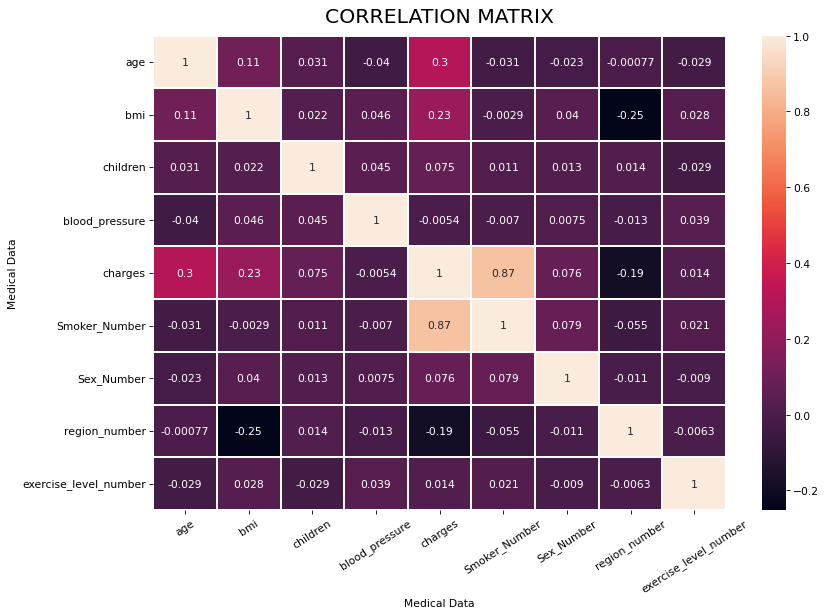

In [55]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)

plt.title('Correlation Matrix'.upper(), size=19, pad=13)

plt.xlabel('Medical Data')
plt.ylabel('Medical Data')
plt.xticks(rotation=33)

plt.show()

in this matrix, we see that the number of smoker people have strong correlation with charges. which means the smoking greatly affect the charges. the age and bmi are correlated with charges but they are weak. also region are correlated with bmi anad charges negatively.

In [56]:
missing_value = df1.isnull().mean()* 100
print(missing_value)

age                      0.0
sex                      0.0
bmi                      0.0
children                 0.0
smoker                   0.0
region                   0.0
blood_pressure           0.0
exercise_level           0.0
charges                  0.0
Smoker_Number            0.0
Sex_Number               0.0
region_number            0.0
exercise_level_number    0.0
dtype: float64


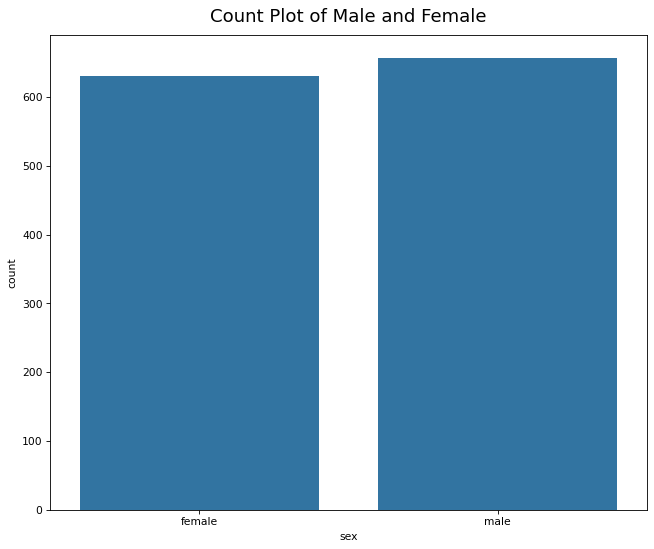

In [ ]:
#Count Plot of Male vs. Female:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df1['sex'],data = df1)
plt.title("Count Plot of Male and Female", size=17, pad= 13)

plt.show()

in this count plot we can say that male are in great numbers than female. it seems male are around 650-700. on the other hand female are lower than 650. but this difference are not much as for numbers

Text(0, 0.5, 'Total_Charges')

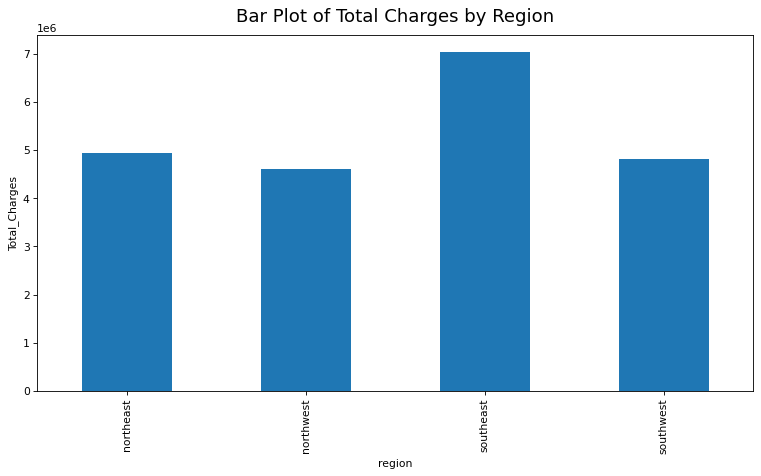

In [ ]:
#Bar Plot of Total charges by regions
Total_Sales = df1.groupby('region')['charges'].sum()

plt.figure(figsize=(12,6), dpi=77)
Total_Sales.plot(kind='bar')
plt.title("Bar Plot of Total Charges by Region", size=17, pad=13 )


plt.ylabel('Total_Charges')

the bar plot shows, the total charges according to regions.here the southeast region have higest charges than other regions, which indicates the people in this region spent great amount of money for treatment also they may ignore health rules or they may have higher medical cost. on the other hand, northwest have lowest patient of health issues. and as for northeast and southwest have almost similar amount of charges

[np.float64(11348614.449039996), np.float64(10040221.143338226)]


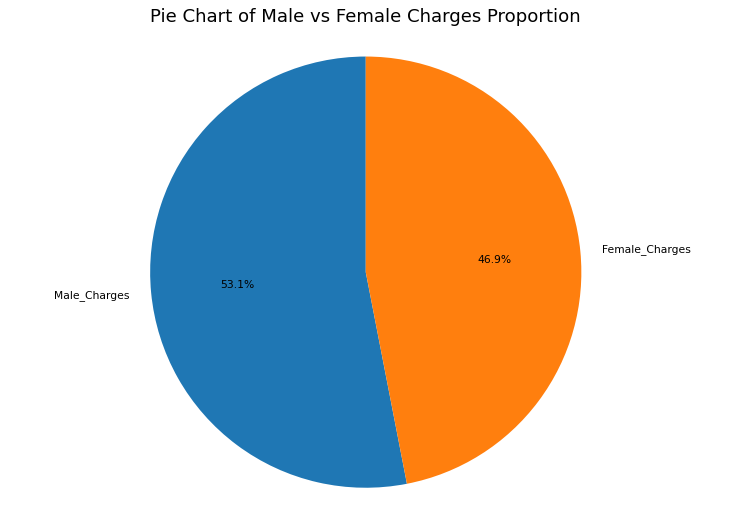

In [ ]:
#Pie Chart of Male vs. Female Charges Proportion:
hS1 = df1[df1['sex'] == 'male']['charges'].sum()
hS2 = df1[df1['sex'] == 'female']['charges'].sum()
proportions = [hS1,hS2]
print(proportions)

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df1, labels= ['Male_Charges', 'Female_Charges'], startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Pie Chart of Male vs Female Charges Proportion", size=17, pad=13)
plt.show()

the pie chat shows, male spend more for medical cost than female. the toal charge for this dataset the male charges overcome more than 50% and female less than 50%.

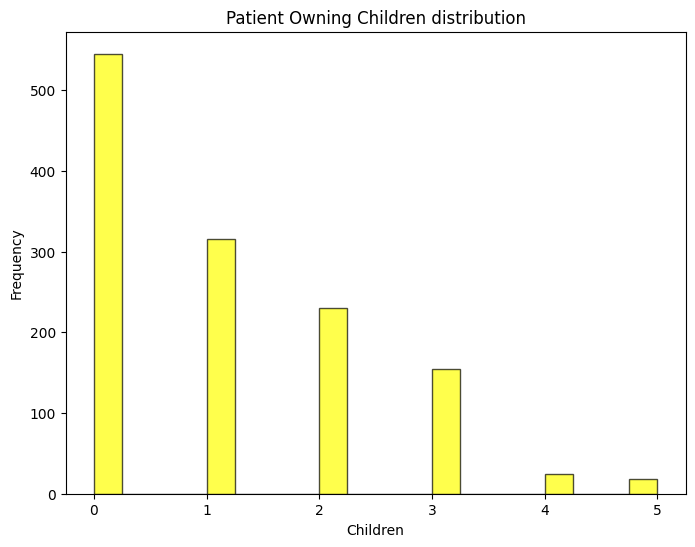

In [ ]:
# Histogram: Children distribution of the Patients
plt.figure(figsize=(8, 6))

plt.hist(df1['children'], bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Patient Owning Children distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show()

the histogram shows the patient who dont have no children are highest iin number and it gradually decreases until 5. as for who have children 4 or 5 are very little numbers

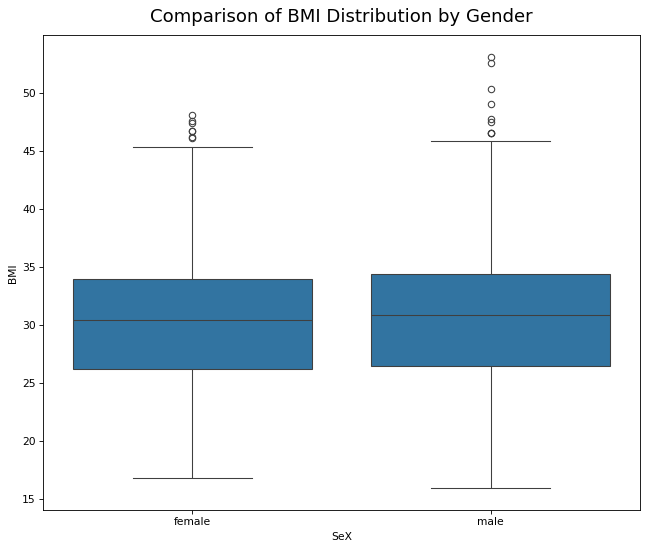

In [ ]:
# Age comparision of BMI
plt.figure(figsize=(10, 8), dpi=77)
sns.boxplot(x="sex", y="bmi", data=df1)

plt.title("Comparison of BMI Distribution by Gender", size=17, pad=13)
plt.ylabel("BMI")
plt.xlabel("SeX")
plt.show()

this shows the bmi value for both male and female start after 26 and it continues until 34 for these people. the bmi outliers for male are greater in numbers and hifher than female. the bmi outliers for male exceed 50 and as for female it remains under 50

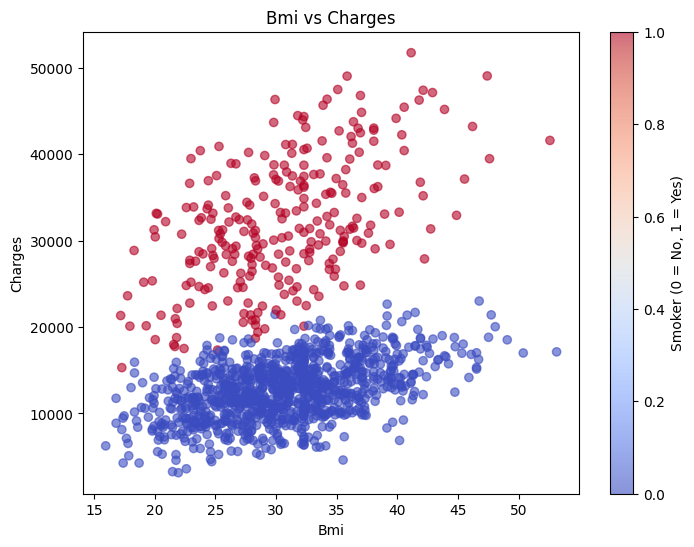

In [ ]:
#Scatter plot Bmi vs Charges
color_map = df1['smoker'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(8, 6))
plt.scatter(df1['bmi'], df1['charges'], c=color_map, cmap='coolwarm', alpha=0.6)
plt.title('Bmi vs Charges')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.colorbar(label='Smoker (0 = No, 1 = Yes)')
plt.show()

the scatter plot shows, the great relation of bmi and charges alongside with smoking. the plot shows the smoker have higher medical charges . as bmi increases the charges for smoker increase also gradually. the charges for non smoker are consized. on the other hand the smoker charges are wide spreaded

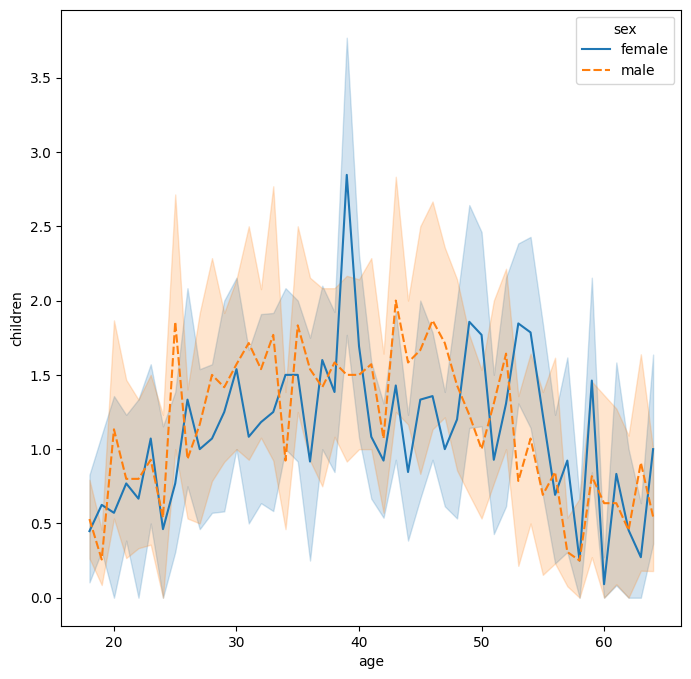

In [ ]:
#line plot of AGE vs children according to gender
plt.figure(figsize=(8,8))
sns.lineplot(x="age", y="children", hue="sex", style="sex", data=df1)
plt.show()

the line plot shows the children distribution of the patients according with age. it shows lower age patient have small number of children but around 25 years age the children of male rise suddenly and decreses then after. around 40 age the number of children for female increases highly which is the highest number for male also. after 40 years female having children moves upside down but for male the numbers usually decreases. again the numbers come back at same at the last stage of the age years. also we can say that the dats for this plot are normally skewed.

In [14]:
#Dividing column for model
x1 = df2.drop(columns = ['charges'])
y1 = df2['charges']

In [16]:
#declaring and initializing
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

print(x1_train)
print(y1_train)

print(x1_test)
print(y1_test)

      age     bmi  children  blood_pressure  Smoker_Number  Sex_Number  \
661    57  23.980         1      999.000000              0           0   
701    50  44.745         0      140.000000              0           0   
859    57  28.100         0      293.608122              0           1   
1197   41  33.550         0      150.000000              0           1   
138    54  31.900         3      293.608122              0           0   
...   ...     ...       ...             ...            ...         ...   
1086   55  28.975         0      160.000000              0           1   
1139   19  32.490         0      999.000000              1           0   
1177   40  27.400         1      293.608122              0           0   
896    43  20.045         2      140.000000              1           0   
1172   56  41.910         0      140.000000              0           0   

      region_number  exercise_level_number  
661               1                      3  
701               3  

In [17]:
missing_value = df2.isnull().mean()* 100
print(missing_value)

age                      0.0
bmi                      0.0
children                 0.0
blood_pressure           0.0
charges                  0.0
Smoker_Number            0.0
Sex_Number               0.0
region_number            0.0
exercise_level_number    0.0
dtype: float64


In [18]:
#Creating Model
lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)
lr1_pred = lr1.predict(x1_test)
#LR Error
lr_mae = mean_absolute_error(y1_test, lr1_pred)
lr_mse = mean_squared_error(y1_test, lr1_pred)
lr_rmse = np.sqrt(mean_squared_error(y1_test, lr1_pred))

mean_target = np.mean(y1_test)
mae_percent = (lr_mae / mean_target) * 100
rmse_percent = (lr_rmse / mean_target) * 100

print("Mean of target (medical cost):", mean_target)


print('MAE Linear Regression: ', lr_mae)
print("MAE as % of mean target:", mae_percent)

print('MSE Linear Regression: ', lr_mse)

print('RMSE Linear Regression: ', lr_rmse)
print("RMSE as % of mean target:", rmse_percent)

print("R2 Score:", r2_score(y1_test, lr1_pred))

Mean of target (medical cost): 15836.713559396558
MAE Linear Regression:  2143.1828159011757
MSE Linear Regression:  7157336.700482173
RMSE Linear Regression:  2675.3199248841574
RMSE as % of mean target: 16.893150935957813
R2 Score: 0.9005888938204


our Linear Regression model achieved an R² score of 0.9006, indicating it explains about 90% of the variance in medical costs. The MAE is 2143.18 and the RMSE is 2675.32, which corresponds to 16.89% of the mean target value (15836.71). These results suggest that the model has good predictive performance, with errors remaining reasonably low compared to the average medical cost.

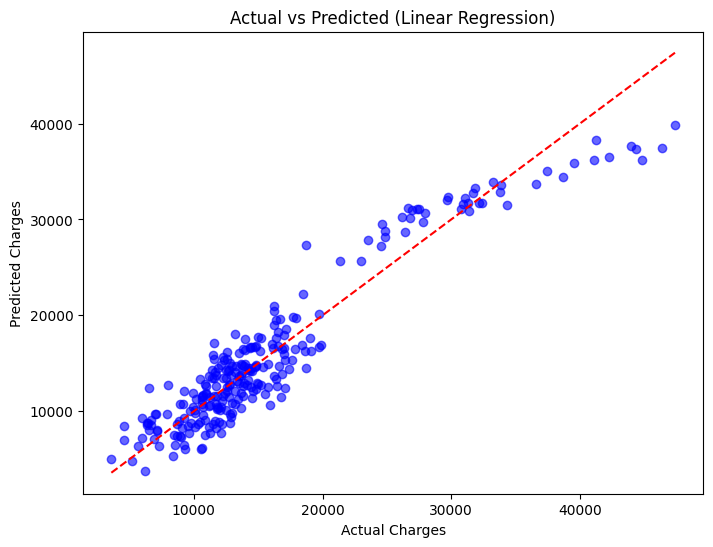

In [ ]:

#actual vs predicted Plot

plt.figure(figsize=(8,6))
plt.scatter(y1_test, lr1_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--')
plt.show()

the predictions model shows it works good until 20000 charges. after 30000 the predictions move far slightly from the red line and it might predic bad number for the model

In [21]:
#Decision Tree Model
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(x1_train, y1_train)

y_pred = model.predict(x1_test)

mae = mean_absolute_error(y1_test, y_pred)

m = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(m)
mae_percent = (mae / mean_target) * 100
rmse_percent = (rmse / mean_target) * 100

print("Mean of target (medical cost):", mean_target)




print("MAE:", mae)
print("MAE as % of mean target:", mae_percent)

print("MSE:", mean_squared_error(y1_test, y_pred))

print("RMSE:", rmse)
print("RMSE as % of mean target:", rmse_percent)

print("R2 Score:", r2_score(y1_test, y_pred))

Mean of target (medical cost): 15836.713559396558
MAE: 2066.347131064565
MAE as % of mean target: 13.04782790516861
MSE: 7066064.167757633
RMSE: 2658.206945999057
RMSE as % of mean target: 16.7850920333268
R2 Score: 0.901856614457512


our decision tree model achieved an R² score of 0.9019, slightly higher than Linear Regression’s 0.9006, indicating both models explain about 90% of the variance in medical costs. The MAE for Decision Tree is 2066.35 (13.05% of the mean target), which is lower than Linear Regression’s 2143.18 (13.53%), showing that the tree makes smaller average errors. Similarly, the RMSE of 2658.21 (16.79%) is slightly better than Linear Regression’s 2675.32 (16.89%). Overall, both models perform strongly, but the Decision Tree provides a marginally better fit and error rate compared to Linear Regression.